In [1]:
from __future__ import print_function
import numpy as np
import mxnet as mx

In [2]:
from datetime import date
date.today()

datetime.date(2017, 12, 26)

In [3]:
author = "lambdaofgod. based on https://github.com/Kyubyong/tensorflow-exercises"

In [4]:
mx.__version__

'0.12.1'

In [5]:
np.__version__

'1.12.1'

### Q1-3.

You are to implement the graph below. Complete the code.

<img src="figs/fig1.png",width=500>

In [6]:
# Q1. Create a graph

a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = a * b
d = a + b
e = c - d

# Q2. Fetch c, d, e
#_c, _d, _e = sess.run([c, d, e])
g = mx.sym.Group([c,d,e])
executor = g.bind(
  ctx=mx.cpu(),
  args={
    'a': mx.nd.ones((1,)),
    'b': 2 * mx.nd.ones((1,)),}
)
executor.forward()

_c, _d, _e = tuple(expr.asscalar() for expr in executor.outputs)

print("c =", _c)
print("d =", _d)
print("e =", _e)

c = 2.0
d = 3.0
e = -1.0


### Q3.
You are to implement the graph below. Complete the code.

<img src="figs/fig3_new.png",width=200>

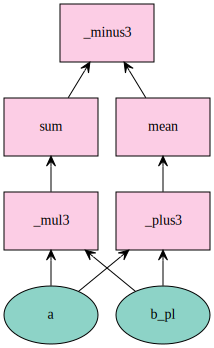

In [12]:
# Define inputs
a = mx.sym.Variable('a', shape=(1,))
b_pl = mx.sym.Variable("b_pl", shape=[0])

# Ops
c = a * b_pl
d = a + b_pl
e = mx.sym.sum(c, name='sum')
f = mx.sym.mean(d, name='mean')
g = e - f

mx.viz.plot_network(g)